In [77]:
import json, os
import argparse
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from data_loader import load_data
from models.cnn_geo import CNN_geo

from test_codes import data, train, visualize
from utils import image
import geo_transform as tps
import CNNgeo_debug

# 1. Read configuration file

In [2]:
with open('overfit.json') as fp:
    config = json.load(fp)
split = 'val'

In [3]:
#data.synthesize_image_pair(config, split)

In [4]:
print(config['train'])

{'n_examples': 1, 'learning_rate': 0.0001, 'batch_size': 1, 'epochs': 200, 'print_step': 10}


In [5]:
print("backbone : ", config['backbone'])
print("n_examples : ", config['train']['n_examples'])
print("learning_rate : ", config['train']['learning_rate'])
print("batch_size : ", config['train']['batch_size'])
print("epoch num : ", config['train']['epochs'])

backbone :  prototypical_network
n_examples :  1
learning_rate :  0.0001
batch_size :  1
epoch num :  200


# 2. Train model on the config parameters

In [6]:
model = CNNgeo_debug.train(config)

train dataset amount : 1
val dataset amount : 1
start of epoch 1
Training loss (for one batch) at step 0: 0.5712886452674866
Epoch 1, Loss: 0.5712886452674866, Val Loss: 0.4634566605091095
end of epoch.
start of epoch 2
Training loss (for one batch) at step 0: 0.4884079694747925
Epoch 2, Loss: 0.4884079694747925, Val Loss: 0.6383827328681946
end of epoch.
start of epoch 3
Training loss (for one batch) at step 0: 0.3939598798751831
Epoch 3, Loss: 0.3939598798751831, Val Loss: 0.47034844756126404
end of epoch.
start of epoch 4
Training loss (for one batch) at step 0: 0.6516630053520203
Epoch 4, Loss: 0.6516630053520203, Val Loss: 0.3759628236293793
end of epoch.
start of epoch 5
Training loss (for one batch) at step 0: 0.5822676420211792
Epoch 5, Loss: 0.5822676420211792, Val Loss: 0.49553993344306946
end of epoch.
start of epoch 6
Training loss (for one batch) at step 0: 0.5540783405303955
Epoch 6, Loss: 0.5540783405303955, Val Loss: 0.4133233428001404
end of epoch.
start of epoch 7
Tra

Training loss (for one batch) at step 0: 0.6282123923301697
Epoch 53, Loss: 0.6282123923301697, Val Loss: 0.4928770661354065
end of epoch.
start of epoch 54
Training loss (for one batch) at step 0: 0.47281020879745483
Epoch 54, Loss: 0.47281020879745483, Val Loss: 0.5408595204353333
end of epoch.
start of epoch 55
Training loss (for one batch) at step 0: 0.459926575422287
Epoch 55, Loss: 0.459926575422287, Val Loss: 0.46584567427635193
end of epoch.
start of epoch 56
Training loss (for one batch) at step 0: 0.5714284777641296
Epoch 56, Loss: 0.5714284777641296, Val Loss: 0.4911426305770874
end of epoch.
start of epoch 57
Training loss (for one batch) at step 0: 0.4439919590950012
Epoch 57, Loss: 0.4439919590950012, Val Loss: 0.520962655544281
end of epoch.
start of epoch 58
Training loss (for one batch) at step 0: 0.46264946460723877
Epoch 58, Loss: 0.46264946460723877, Val Loss: 0.4989558458328247
end of epoch.
start of epoch 59
Training loss (for one batch) at step 0: 0.5565198063850

start of epoch 105
Training loss (for one batch) at step 0: 0.4904518723487854
Epoch 105, Loss: 0.4904518723487854, Val Loss: 0.5173203945159912
end of epoch.
start of epoch 106
Training loss (for one batch) at step 0: 0.5247542262077332
Epoch 106, Loss: 0.5247542262077332, Val Loss: 0.5018515586853027
end of epoch.
start of epoch 107
Training loss (for one batch) at step 0: 0.4688478112220764
Epoch 107, Loss: 0.4688478112220764, Val Loss: 0.3836860656738281
end of epoch.
start of epoch 108
Training loss (for one batch) at step 0: 0.44762396812438965
Epoch 108, Loss: 0.44762396812438965, Val Loss: 0.45934149622917175
end of epoch.
start of epoch 109
Training loss (for one batch) at step 0: 0.5172584056854248
Epoch 109, Loss: 0.5172584056854248, Val Loss: 0.4682219922542572
end of epoch.
start of epoch 110
Training loss (for one batch) at step 0: 0.5427110195159912
Epoch 110, Loss: 0.5427110195159912, Val Loss: 0.4763382077217102
end of epoch.
start of epoch 111
Training loss (for one b

Training loss (for one batch) at step 0: 0.4828932583332062
Epoch 157, Loss: 0.4828932583332062, Val Loss: 0.5801430344581604
end of epoch.
start of epoch 158
Training loss (for one batch) at step 0: 0.4602213501930237
Epoch 158, Loss: 0.4602213501930237, Val Loss: 0.5199398994445801
end of epoch.
start of epoch 159
Training loss (for one batch) at step 0: 0.48783954977989197
Epoch 159, Loss: 0.48783954977989197, Val Loss: 0.4101179242134094
end of epoch.
start of epoch 160
Training loss (for one batch) at step 0: 0.5326712131500244
Epoch 160, Loss: 0.5326712131500244, Val Loss: 0.5161991119384766
end of epoch.
start of epoch 161
Training loss (for one batch) at step 0: 0.464263379573822
Epoch 161, Loss: 0.464263379573822, Val Loss: 0.43349042534828186
end of epoch.
start of epoch 162
Training loss (for one batch) at step 0: 0.5040882229804993
Epoch 162, Loss: 0.5040882229804993, Val Loss: 0.4529963731765747
end of epoch.
start of epoch 163
Training loss (for one batch) at step 0: 0.51

# 3. Debug codes

In [8]:
datasets = load_data(['train'], config)
ds = datasets['train'].batch(1)

train dataset amount : 1


In [9]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
#image_B_hat = np.ones([1, 64, 64, 3])
pred, score = model(image_A, image_B)

In [10]:
print("parameter shape", pred.shape)
print("score shape", score.shape)
print(image_A.shape)

parameter shape (1, 9, 2)
score shape (1, 16, 16, 16, 16)
(1, 64, 64, 3)


## a. 모델은 이미지쌍(image A, image B)으로부터 모션 파라미터를 추정할 수 있는가?

### 반복 시행 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


compare gt : [[[-0.02139187 -0.08553209]
  [ 0.03350978 -0.19682245]
  [-0.1350205  -0.02365365]
  [ 0.11263432  0.05010648]
  [-0.11744966  0.01519408]
  [ 0.10021029  0.01696744]
  [-0.01720166 -0.09088793]
  [-0.12012472  0.18594031]
  [ 0.14531755 -0.11497416]]] and 
 pred : [[[-6.4122076e-03 -2.2053267e-03]
  [-5.8086230e-03  7.2651817e-03]
  [ 2.8018632e-05 -2.0717497e-03]
  [-3.0902869e-03  6.9397828e-03]
  [ 3.0633926e-03 -4.1388016e-04]
  [-2.2451202e-03  2.3301861e-03]
  [-6.9359485e-03  3.6676824e-03]
  [-1.7096477e-03  1.3156987e-03]
  [-5.1014586e-03 -1.0522467e-03]]]
loss : [0.10128091]


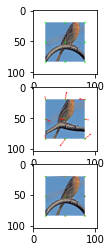

In [11]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_B)

print("compare gt : {} and \n pred : {}".format(parameters, pred))
loss = tf.reduce_sum(tf.keras.losses.MSE(pred, parameters), axis=1)
print("loss : {}".format(loss))

pred = pred.numpy()
image_C = list(map(lambda x : image.synthesize_image(x[0], x[1], (64, 64), bbox=None, pad_ratio=None),
                   zip(image_A.copy(), pred.copy())))    
image_C = np.array(image_C)
visualize.show_TPS_image([image_A, image_B, image_C], [np.ones_like(parameters), parameters, pred])    

pred1 = pred.copy()

### 반복 시행 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


compare gt : [[[-0.08233891 -0.0281426 ]
  [ 0.00343189  0.03412061]
  [ 0.18529049 -0.10715523]
  [-0.18768425 -0.0465436 ]
  [-0.17735325  0.03016448]
  [ 0.16513525  0.19605155]
  [-0.13329425  0.18308721]
  [-0.02632952 -0.00862975]
  [ 0.02215934 -0.0313406 ]]] and 
 pred : [[[-6.4122076e-03 -2.2053267e-03]
  [-5.8086230e-03  7.2651817e-03]
  [ 2.8018632e-05 -2.0717497e-03]
  [-3.0902869e-03  6.9397828e-03]
  [ 3.0633926e-03 -4.1388016e-04]
  [-2.2451202e-03  2.3301861e-03]
  [-6.9359485e-03  3.6676824e-03]
  [-1.7096477e-03  1.3156987e-03]
  [-5.1014586e-03 -1.0522467e-03]]]
loss : [0.11954852]


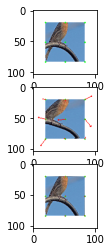

In [12]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_B)

print("compare gt : {} and \n pred : {}".format(parameters, pred))
loss = tf.reduce_sum(tf.keras.losses.MSE(pred, parameters), axis=1)
print("loss : {}".format(loss))

pred = pred.numpy()
image_C = list(map(lambda x : image.synthesize_image(x[0], x[1], (64, 64), bbox=None, pad_ratio=None),
                   zip(image_A.copy(), pred.copy())))    
image_C = np.array(image_C)
visualize.show_TPS_image([image_A, image_B, image_C], [np.ones_like(parameters), parameters, pred])    

pred2 = pred.copy()

### Garbage image B


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


compare gt : [[[-0.08233891 -0.0281426 ]
  [ 0.00343189  0.03412061]
  [ 0.18529049 -0.10715523]
  [-0.18768425 -0.0465436 ]
  [-0.17735325  0.03016448]
  [ 0.16513525  0.19605155]
  [-0.13329425  0.18308721]
  [-0.02632952 -0.00862975]
  [ 0.02215934 -0.0313406 ]]] and 
 pred : [[[-6.4122076e-03 -2.2053267e-03]
  [-5.8086230e-03  7.2651817e-03]
  [ 2.8018632e-05 -2.0717497e-03]
  [-3.0902869e-03  6.9397828e-03]
  [ 3.0633926e-03 -4.1388016e-04]
  [-2.2451202e-03  2.3301861e-03]
  [-6.9359485e-03  3.6676824e-03]
  [-1.7096477e-03  1.3156987e-03]
  [-5.1014586e-03 -1.0522467e-03]]]
loss : [0.11954852]


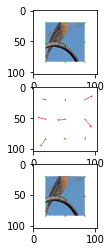

In [13]:
image_B = np.ones([1, 64, 64, 3])
pred, score = model(image_A, image_B)

print("compare gt : {} and \n pred : {}".format(parameters, pred))
loss = tf.reduce_sum(tf.keras.losses.MSE(pred, parameters), axis=1)
print("loss : {}".format(loss))

pred = pred.numpy()
image_C = list(map(lambda x : image.synthesize_image(x[0], x[1], (64, 64), bbox=None, pad_ratio=None),
                   zip(image_A.copy(), pred.copy())))    
image_C = np.array(image_C)
visualize.show_TPS_image([image_A, image_B, image_C], [np.ones_like(parameters), parameters, pred])    

pred3 = pred.copy()

In [14]:
print(pred1, "\n", pred2, "\n", pred3)

[[[-6.4122076e-03 -2.2053267e-03]
  [-5.8086230e-03  7.2651817e-03]
  [ 2.8018632e-05 -2.0717497e-03]
  [-3.0902869e-03  6.9397828e-03]
  [ 3.0633926e-03 -4.1388016e-04]
  [-2.2451202e-03  2.3301861e-03]
  [-6.9359485e-03  3.6676824e-03]
  [-1.7096477e-03  1.3156987e-03]
  [-5.1014586e-03 -1.0522467e-03]]] 
 [[[-6.4122076e-03 -2.2053267e-03]
  [-5.8086230e-03  7.2651817e-03]
  [ 2.8018632e-05 -2.0717497e-03]
  [-3.0902869e-03  6.9397828e-03]
  [ 3.0633926e-03 -4.1388016e-04]
  [-2.2451202e-03  2.3301861e-03]
  [-6.9359485e-03  3.6676824e-03]
  [-1.7096477e-03  1.3156987e-03]
  [-5.1014586e-03 -1.0522467e-03]]] 
 [[[-6.4122076e-03 -2.2053267e-03]
  [-5.8086230e-03  7.2651817e-03]
  [ 2.8018632e-05 -2.0717497e-03]
  [-3.0902869e-03  6.9397828e-03]
  [ 3.0633926e-03 -4.1388016e-04]
  [-2.2451202e-03  2.3301861e-03]
  [-6.9359485e-03  3.6676824e-03]
  [-1.7096477e-03  1.3156987e-03]
  [-5.1014586e-03 -1.0522467e-03]]]


In [169]:
model.summary()

Model: "cnn_geo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature__extractor (Feature_ multiple                  113600    
_________________________________________________________________
correlation_network (Correla multiple                  0         
_________________________________________________________________
spatial_transformer_regresso multiple                  875250    
Total params: 988,850
Trainable params: 988,146
Non-trainable params: 704
_________________________________________________________________


### zero correlation을 입력했을 때 : 역시 같은 결과

In [171]:
model.layers[2](np.zeros([16,16,16,16], np.float32))

<tf.Tensor: shape=(1, 18), dtype=float32, numpy=
array([[-6.4122076e-03, -2.2053267e-03, -5.8086230e-03,  7.2651817e-03,
         2.8018632e-05, -2.0717497e-03, -3.0902869e-03,  6.9397828e-03,
         3.0633926e-03, -4.1388016e-04, -2.2451202e-03,  2.3301861e-03,
        -6.9359485e-03,  3.6676824e-03, -1.7096477e-03,  1.3156987e-03,
        -5.1014586e-03, -1.0522467e-03]], dtype=float32)>

## b. 특징추출기의 정상 동작 검증

### 동일 영상에 대한 correlation

In [111]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_A)

score = score.numpy()[0]
parameters = parameters[0]
image_A = image_A[0]
image_B = image_B[0]

print(score.shape, parameters.shape, image_A.shape)

(16, 16, 16, 16) (9, 2) (64, 64, 3)


In [267]:
def get_matching_grid_from_B(parameters, center_point):
    src_points = np.array([[0.0, 0.0], [0.5, 0.0], [1.0, 0.0],
                                   [0.0, 0.5], [0.5, 0.5], [1.0, 0.5],
                                   [0.0, 1.0], [0.5, 1.0], [1.0, 1.0]])

    dst_points = src_points +parameters

    theta = tps.tps_theta_from_points(src_points, dst_points, reduced=True)
    dshape = (64, 64)
    grid = tps.tps_grid(theta, src_points, dshape)
    mapx, mapy = tps.tps_grid_to_remap(grid, (64, 64))
    points = np.concatenate([mapx[:,:,np.newaxis], mapy[:,:,np.newaxis]], axis=2)
   
    center_point = np.array(center_point)
    center_point = center_point[np.newaxis, np.newaxis, :]
    print("center", center_point)
    distance = np.sum(np.power((points - center_point), 2), axis=2)

    ri, ci = distance.argmin()//distance.shape[1], distance.argmin()%distance.shape[1]
    return (ci, ri)

In [278]:
def score_test(grid_coord, score, parameters, images, grid_shape=(16,16)):
    image_A, image_B = images
    score = score[grid_coord[0], grid_coord[1]]
    H, W, C = image_A.shape
    grid_size = H/grid_shape[0], W/grid_shape[1]

    start_pix_h = int(grid_size[0]*grid_coord[0])
    end_pix_h = int(grid_size[0]*(1+grid_coord[0]))
    start_pix_w = int(grid_size[1]*grid_coord[1])
    end_pix_w = int(grid_size[1]*(1+grid_coord[1]))
    
    drawn_grid_image_A = image_A.copy()
    drawn_grid_image_A[start_pix_h:end_pix_h, start_pix_w:end_pix_w] = (0,0,0)   
    
    expected_drawn_grid_image_B = image_B.copy()
    grid_center_A = (int(start_pix_h+grid_size[0]/2), int(start_pix_w+grid_size[1]/2))
    grid_center_B = get_matching_grid_from_B(parameters, grid_center_A)
    print(grid_center_B, grid_center_B.__class__)
    start_pix_h = int(grid_center_B[0] - grid_size[0]/2)
    start_pix_w = int(grid_center_B[1] - grid_size[1]/2)
    end_pix_h = int(grid_center_B[0] + grid_size[0]/2)
    end_pix_w = int(grid_center_B[1] + grid_size[1]/2)
    expected_drawn_grid_image_B[start_pix_h:end_pix_h, start_pix_w:end_pix_w] = (0,0,0)
    
    drawn_grid_image_B = image_B.copy()
    max_correlation_grid_index = score.argmin()//score.shape[1], score.argmin()%score.shape[1]
    print(max_correlation_grid_index)
    start_pix_h = int(max_correlation_grid_index[0] - grid_size[0]/2)
    start_pix_w = int(max_correlation_grid_index[1] - grid_size[1]/2)
    end_pix_h = int(max_correlation_grid_index[0] + grid_size[0]/2)
    end_pix_w = int(max_correlation_grid_index[1] + grid_size[1]/2)    
    drawn_grid_image_B[start_pix_h:end_pix_h, start_pix_w:end_pix_w] = (0,0,0)
    
    print("top 10 correlation values in descending : ", np.sort(score.flatten())[::-1][:10])
    
    return drawn_grid_image_A, expected_drawn_grid_image_B, drawn_grid_image_B

In [279]:
def plot_images(images, plot_shape, moving_vectors=None):
    rows, cols = plot_shape
    fig = plt.figure()
    for row in range(rows):
        for col in range(cols):
            image = images[row][col]
            fig.add_subplot(rows, cols, row*cols+col+1).imshow(image)
    plt.show()

In [280]:
drawn_image_A, expected_drawn_grid_image_B, drawn_grid_image_B = score_test(grid_coord=(0,0), score=score, parameters=np.zeros([9,2]), images=(image_A, image_A))

center [[[2 2]]]
(2, 2) <class 'tuple'>
(15, 6)
top 10 correlation values in descending :  [0.08045571 0.07374886 0.07362973 0.07360967 0.07322403 0.07315692
 0.07315629 0.07313433 0.07307883 0.07305346]


In [281]:
drawn_image_A.shape
expected_drawn_grid_image_B.shape
drawn_grid_image_B.shape

(64, 64, 3)

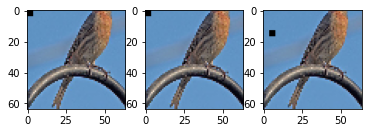

In [282]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(drawn_image_A)
ax2.imshow(expected_drawn_grid_image_B)
ax3.imshow(drawn_grid_image_B)

plt.show()


# grid_point (5, 5) on image A

center [[[22 30]]]
(22, 30) <class 'tuple'>
(0, 0)
top 10 correlation values in descending :  [0.06518701 0.0648452  0.06483168 0.06479623 0.06471241 0.06467468
 0.06462499 0.06459589 0.06457857 0.06454716]


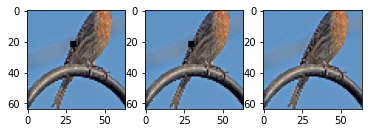

In [283]:
grid_point = (5,7)
drawn_image_A, expected_drawn_grid_image_B, drawn_grid_image_B = score_test(grid_coord=grid_point, 
                                                                            score=score, 
                                                                            parameters=np.zeros([9,2]), 
                                                                            images=(image_A, image_A))
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(drawn_image_A)
ax2.imshow(expected_drawn_grid_image_B)
ax3.imshow(drawn_grid_image_B)

plt.show()

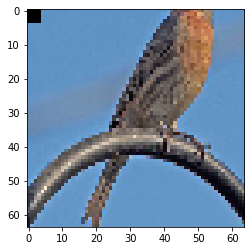

In [250]:
plt.imshow(expected_drawn_grid_image_B)

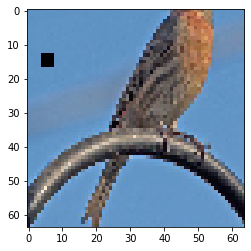

In [251]:
plt.imshow(drawn_grid_image_B)

In [ ]:

for i in range(16):
    drawn_image_A, expected_drawn_grid_image_B, drawn_grid_image_B = score_test(grid_coord=(i,i), score=score, parameters=parameters, images=(image_A, image_B))


In [ ]:
import geo_transform as tps
import numpy as np

In [ ]:
mapx[:,:,np.newaxis].shape

In [ ]:
points = np.concatenate([mapx[:,:,np.newaxis], mapy[:,:,np.newaxis]], axis=2)

In [ ]:
points.shape

In [ ]:
points[0, 0]

In [ ]:
from models.cnn_geo import CNN_geo
from data_loader import load_data
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
model = CNN_geo(config['backbone'])
ckpt_dir = os.path.join(
        'checkpoints', config['model_name'], config['exp_desc'])
ckpt = os.path.join(ckpt_dir, "{}-{}.h5".format(config['model_name'], str(config['train']['epochs'])))
model.load(ckpt)

In [ ]:
model.layers

In [ ]:
model.layers[2](np.ones([1, 16,16,16,16]))

In [ ]:
datasets = load_data(['train'], config)
ds = datasets['train'].batch(1)
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()

In [ ]:
image_A.shape, image_B.shape

x = model.layers[0](image_A)
y = model.layers[0](image_B)

In [ ]:
plt.imshow(image_A[0])

In [ ]:
plt.imshow(image_B[0])

In [ ]:
import tensorflow as tf

In [ ]:
score = model.layers[1](x, y)

In [ ]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
print(np.max(score[0, 0,0]))

In [ ]:
print(score[0,0,0])

In [ ]:
parameters

In [ ]:
model.layers[2](score)

In [ ]:
vgg = tf.keras.applications.VGG16(weights='imagenet', input_shape=(64, 64, 3), include_top=False)

In [ ]:
model = tf.keras.Model(inputs=vgg.layers[0].input, outputs=vgg.layers[9].output)

In [ ]:
model.summary()